## Sentiment analysis with Twitter messages containing 'Trump'.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

### Load Sentiment140 Tweet Corpus
Data from http://help.sentiment140.com/for-students

In [2]:
colnames = ["polarity", "id", "date", "query", "user", "text"]
data = pd.read_csv("trainingandtestdata/training.1600000.processed.noemoticon.csv", encoding="latin1", names=colnames)

In [3]:
len(data)

1600000

In [4]:
data.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


### Sample of data
Because there are 1.6 million documents, I'll take a 10% sample to start with.

In [5]:
sample = data.sample(frac=0.1, replace=False, random_state=42)

In [6]:
len(sample)

160000

In [7]:
sample.head()

,polarity,id,date,query,user,text
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps for my razr 2"
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u"
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


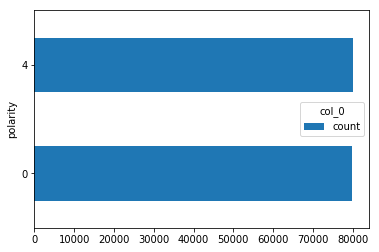

In [9]:
pd.crosstab(index = sample["polarity"], columns = "count").plot.barh(rot=0)

So half of the documents have positive sentiment and half of them negative sentiment.

### Preprocessing the data
Because we want to classify the documents as having a positive or negative sentiment, I'll introduce the variable sentiment,  
which is either 1 (positive) or 0 (negative).

In [10]:
#ignore all 2* tweets
sample = sample[sample['polarity'] != 2]

#positive sentiment = 4* tweets
sample['sentiment'] = (sample['polarity'] ==4).astype(int)

In [11]:
sample.head()

,polarity,id,date,query,user,text,sentiment
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,0
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps for my razr 2",0
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u",0
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(,0
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,0


In [12]:
def remove_punctuation(text):
    import string
    map = text.maketrans('', '', string.punctuation)
    return text.lower().translate(map) 

sample['text_clean'] = sample['text'].apply(remove_punctuation)

In [13]:
sample.head()

,polarity,id,date,query,user,text,sentiment,text_clean
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,0,chrishasboobs ahhh i hope your ok
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps for my razr 2",0,misstoriblack cool i have no tweet apps for my razr 2
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u",0,tiannachaos i know just family drama its lamehey next time u hang out with kim n u guys like have a sleepover or whatever ill call u
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(,0,school email wont open and i have geography stuff on there to revise stupid school
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,0,upper airways problem


In [14]:
sample['text_clean'].iloc[0]

'chrishasboobs ahhh i hope your ok '

### Split sample in train & validation set

In [15]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(sample, test_size=0.2, random_state=42)

In [16]:
train.head()

,polarity,id,date,query,user,text,sentiment,text_clean
510880,0,2189760229,Tue Jun 16 00:50:14 PDT 2009,NO_QUERY,paula_sixtheden,I'm in the UST library with Carla... Cool. HAHA! I miss the south,0,im in the ust library with carla cool haha i miss the south
1513232,4,2175327003,Mon Jun 15 00:40:47 PDT 2009,NO_QUERY,Hossguy,New followers put a smile on my face.,1,new followers put a smile on my face
674018,0,2247664809,Fri Jun 19 19:26:17 PDT 2009,NO_QUERY,brendanbenson,First week of work is done! Had a great time at the track tonight with @nickconsole as my madison partner. Rain cut it short though.,0,first week of work is done had a great time at the track tonight with nickconsole as my madison partner rain cut it short though
1537476,4,2179628403,Mon Jun 15 09:21:53 PDT 2009,NO_QUERY,writerpen123,Just finished eating some cinnamin toast crunch for breakfast now i am listening to adam lamberts no boundaries!,1,just finished eating some cinnamin toast crunch for breakfast now i am listening to adam lamberts no boundaries
690755,0,2252089992,Sat Jun 20 05:25:38 PDT 2009,NO_QUERY,spanky_leebo,fuckin hungover 2 fuck,0,fuckin hungover 2 fuck


### Bag-of-words model
With "count vectorizer", we merely count the appearance of the words in each tweet text. Since most words occur in only a few tweets, word count vectors are sparse. For this reason, scikit-learn and many other tools use sparse matrices to store a collection of word count vectors.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b') # This token pattern keeps single-letter words
train_matrix = vectorizer.fit_transform(train['text_clean'])
val_matrix = vectorizer.transform(val['text_clean'])

### Using a Decision Tree classifier

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_matrix, train['sentiment'])

In [20]:
pred_tree = clf.predict(val_matrix)
correct_num = np.sum(pred_tree == val['sentiment'])
total_num = len(val['sentiment'])
print("correct_num: {}, total_num: {}".format(correct_num, total_num))
accuracy = correct_num / total_num
print("accuracy: %0.3f" % accuracy)

correct_num: 22590, total_num: 32000
accuracy: 0.706


Let's see if we can do better:
### Using a Logistic Regression classifier

In [21]:
from sklearn.linear_model import LogisticRegression

sentiment_model = LogisticRegression()
sentiment_model.fit(train_matrix, train['sentiment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
pred_lr = sentiment_model.predict(val_matrix)
correct_num = np.sum(pred_lr == val['sentiment'])
total_num = len(val['sentiment'])
print("correct_num: {}, total_num: {}".format(correct_num, total_num))
accuracy = correct_num / total_num
print("accuracy: %0.3f" % accuracy)

correct_num: 25091, total_num: 32000
accuracy: 0.784


### Using a bigger sample

In [23]:
sample2 = data.sample(frac=0.25, replace=False, random_state=42)
sample2 = sample2[sample2['polarity'] != 2]
sample2['sentiment'] = (sample2['polarity'] ==4).astype(int)
sample2['text_clean'] = sample2['text'].apply(remove_punctuation)
train2, val2 = train_test_split(sample2, test_size=0.1, random_state=42)
train2_matrix = vectorizer.fit_transform(train2['text_clean'])
val2_matrix = vectorizer.transform(val2['text_clean'])

In [24]:
sentiment_model.fit(train2_matrix, train2['sentiment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
pred_lr = sentiment_model.predict(val2_matrix)
correct_num = np.sum(pred_lr == val2['sentiment'])
total_num = len(val2['sentiment'])
print("correct_num: {}, total_num: {}".format(correct_num, total_num))
accuracy = correct_num / total_num
print("accuracy: %0.3f" % accuracy)

correct_num: 31627, total_num: 40000
accuracy: 0.791


A little better. Let's look at the ROC-curve:

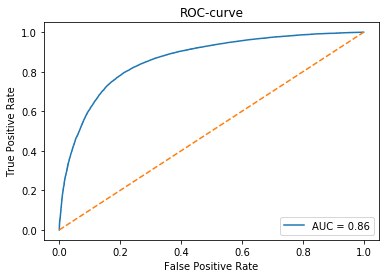

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

prob_lr = sentiment_model.predict_proba(val2_matrix)
fpr, tpr, thresholds = roc_curve(val2['sentiment'], prob_lr[:, 1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(loc="lower right")

In [27]:
coef = sentiment_model.coef_

positive_weights = coef[coef >= 0]
negative_weights = coef[coef < 0]
num_positive_weights = len(positive_weights)
num_negative_weights = len(negative_weights)

print("Number of positive weights: %s " % num_positive_weights)
print("Number of negative weights: %s " % num_negative_weights)

Number of positive weights: 160621 
Number of negative weights: 127494 


In [29]:
import pickle

# save the model to disk
filename = 'models/sentiment_model.sav'
pickle.dump(sentiment_model, open(filename, 'wb'))

### Evaluate on test data

In [30]:
test_data = pd.read_csv("trainingandtestdata/testdata.manual.2009.06.14.csv", encoding="latin1", names=colnames)

In [31]:
len(test_data)

498

In [32]:
test_data.head()

,polarity,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right."
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs is good read.
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!"
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new big one is huge! No need for remorse! :)
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2 and I think it's perfect :)


In [33]:
test_data = test_data[test_data['polarity'] != 2]
test_data['sentiment'] = (test_data['polarity'] ==4).astype(int)
test_data['text_clean'] = test_data['text'].apply(remove_punctuation)
test_matrix = vectorizer.transform(test_data['text_clean'])

pred_lr_test = sentiment_model.predict(test_matrix)
correct_num = np.sum(pred_lr_test == test_data['sentiment'])
total_num = len(test_data['sentiment'])
print("correct_num: {}, total_num: {}".format(correct_num, total_num))
accuracy = correct_num / total_num
print("accuracy on test set: %0.2f" % accuracy)

correct_num: 286, total_num: 359
accuracy on test set: 0.80


### Analysing Tweets containing the word Trump

In [53]:
import tweepy
from tweepy import OAuthHandler
 
consumer_key = 'XXX'
consumer_secret = '***'
access_token = 'XXX'
access_secret = '***'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [54]:
query = "Trump"
language = "en"
results = []

for tweet in tweepy.Cursor(api.search, q=query, lang=language).items(500):
    results.append(tweet)

In [60]:
# save the tweets to disk
file = open('tweets/tweets_Trump.csv', 'w')
for tweet in results:
    file.write("%s\n" % tweet)

In [55]:
len(results)

500

In [56]:
for tweet in results[0:5]:
    print(tweet.user.screen_name,"Tweeted:",tweet.text)

Psychotron7x2 Tweeted: @SteveSchmidtSES @JuddApatow Abandon a Trump supporter from your life. Show them how it feels.
troutldy1 Tweeted: RT @olgaNYC1211: They are all Trumps longtime connections. Trump has been dealing w very powerful Russian Mobsters, Kremlin officials, and…
MonicaVoss4 Tweeted: RT @dumptrump33: To all those who said Hillary Clinton was more dangerous than Donald Trump, you can collectively go fuck yourselves. The T…
jwnoname Tweeted: RT @RealCandaceO: In no way do I endorse Farrakhan’s views but holy crap this is a really big deal.
He has just aligned himself with Trump’…
MohamedHawary Tweeted: RT @WSJ: Macron says Trump likely scrapped the Iran deal 'because it was signed by his predecessor, hence bad by the definition' https://t.…


In [85]:
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]

    return DataSet

DataSet = toDataFrame(results)

In [86]:
DataSet.head()

,tweetText,tweetRetweetCt,tweetSource,tweetCreated,userScreen,userName
0,@SteveSchmidtSES @JuddApatow Abandon a Trump supporter from your life. Show them how it feels.,0,Twitter for iPhone,2018-05-26 17:22:45,Psychotron7x2,Adam
1,"RT @olgaNYC1211: They are all Trumps longtime connections. Trump has been dealing w very powerful Russian Mobsters, Kremlin officials, and…",100,Twitter for iPhone,2018-05-26 17:22:45,troutldy1,Lynn Pless
2,"RT @dumptrump33: To all those who said Hillary Clinton was more dangerous than Donald Trump, you can collectively go fuck yourselves. The T…",381,Twitter for Android,2018-05-26 17:22:44,MonicaVoss4,MG Mom
3,RT @RealCandaceO: In no way do I endorse Farrakhan’s views but holy crap this is a really big deal.\nHe has just aligned himself with Trump’…,6750,Twitter for iPad,2018-05-26 17:22:44,jwnoname,J W at the beach
4,"RT @WSJ: Macron says Trump likely scrapped the Iran deal 'because it was signed by his predecessor, hence bad by the definition' https://t.…",169,Twitter for iPhone,2018-05-26 17:22:44,MohamedHawary,Mohamed Hawary


### Predicting the sentiment for the Trump tweets

In [63]:
DataSet['text_clean'] = DataSet['tweetText'].apply(remove_punctuation)
DataSet_matrix = vectorizer.transform(DataSet['text_clean'])
Predictions = sentiment_model.predict_proba(DataSet_matrix)

In [64]:
DataSet['prediction'] = Predictions[:, 1]

In [65]:
DataSet_sorted = DataSet.sort_values('prediction', ascending=False)

In [78]:
DataSet_sorted[['tweetText', 'prediction']].head(10)

,tweetText,prediction
14,RT @ManInTheHoody: trump is like hitler\n\ntrump is like hitler\n\ntrump is like hitler\n\ntrump is like hitler\n\ntrump is like hitler\n\ntrump is l…,0.999591
33,"RT @EdKrassen: There could be video evidence of Vladimir Putin at Trump Tower, personally delivering voting machines to Donald Trump, and t…",0.996439
411,RT @KevinSussman: Trump team: “Colluding with Russia to swing an election isn’t technically a crime so it’s fine.”\n\nAlso Trump team: “Kneel…,0.996184
76,RT @C_3C_3: SWAMP PANIC:\n\nObama: 5/25/10\nTrump: 5/25/18\n\nObama: Approval: 42% \nTrump: Approval: 49% \n\nObama: Media Coverage: 95% POSITIV…,0.995454
416,"RT @Fuctupmind: ""Let’s just lay it out really simple for the liberals and the media - the FBI had a person that was getting information on…",0.995030
431,"RT @tribelaw: Some people claim that, even if Rosenstein gives Mueller permission to indict Trump as DOJ rules allow, the Constitution forb…",0.994726
183,"RT @tribelaw: Some people claim that, even if Rosenstein gives Mueller permission to indict Trump as DOJ rules allow, the Constitution forb…",0.994726
90,RT @peterbakernyt: Trump told Naval Academy graduates that he gave the military first raise in years and will build nearly 200 new ships ve…,0.993210
131,RT @peterbakernyt: Trump told Naval Academy graduates that he gave the military first raise in years and will build nearly 200 new ships ve…,0.993210
165,"RT @ManInTheHoody: y'all are tripping like this is Donald Trump and Jeff Sessions stealing babies from their parents.\n\nSure, they give the…",0.992235


In [79]:
DataSet_sorted[['tweetText', 'prediction']].tail(10)

,tweetText,prediction
271,RT @sahilkapur: “Horrible law” = not a law. It’s Trump administration policy that didn’t happen under Obama or Bush. POTUS has the power to…,0.021979
204,RT @sahilkapur: “Horrible law” = not a law. It’s Trump administration policy that didn’t happen under Obama or Bush. POTUS has the power to…,0.021979
213,RT @PradRachael: CAVUTO LIVE:\n\nMother of MS-13 Victim\nOn Trump's gangs \nCrackdown \n\nMother of MS-13 victim on Trump's gang crackdown\n\nhttps…,0.017805
200,RT @ZemanLynnZ: Utterly Unfit': MSNBC Panel Is Appalled at Latest Report of Trump's Racist Comments Behind Closed Doors\n https://t.co/sE1rB…,0.017130
468,RT @yorkist1980: I can't imagine why 😒\n\nToday’s politicians seem more hated than ever – but Theresa May’s predecessor had it worse | The In…,0.012561
438,RT @DeanObeidallah: We need more of this!! 'I'm not reading any more of these -- they're lies': MSNBC's Nicolle Wallace refuses to read Tru…,0.012167
169,RT @bjaninemorison: #Trump and #Pence are #racists.\nShame on the @NFL.\nShame on @realDonaldTrump.\nShame on @mike_pence.\nThis is not a new t…,0.012107
136,RT @SpicyFiles: 🚨Oh SNAP🚨\n\nYohai‘ s Attorneys pulled the eject button citing \n-lack of candor\n-lack of payment\n-failure to cooperate\nWonder…,0.006855
174,"RT @4everNeverTrump: 1,475 children.\n\n1,475 children are missing.\n\n1,475 children are missing due to the malicious incompetence of the US G…",0.003065
40,"RT @4everNeverTrump: 1,475 children.\n\n1,475 children are missing.\n\n1,475 children are missing due to the malicious incompetence of the US G…",0.003065


### Tweets that are predicted as very positive

In [76]:
print(DataSet_sorted['tweetText'].iloc[0])

RT @ManInTheHoody: trump is like hitler

trump is like hitler

trump is like hitler

trump is like hitler

trump is like hitler

trump is l…


Obviously the model got it wrong here. Because the tweet contains the word like 5 times, the model thinks this most be a very positive tweet. Here we see a disadvantage of using the bag of words method. We are not looking at the context of the word 'like'.

In [87]:
print(DataSet_sorted['tweetText'].iloc[1])

RT @EdKrassen: There could be video evidence of Vladimir Putin at Trump Tower, personally delivering voting machines to Donald Trump, and t…


This isn't a positive tweet either. So although 80% accuracy on the test set seems promising, there is a lot of room for improvement on this simple model.

In [88]:
print(DataSet_sorted['tweetText'].iloc[2])

RT @KevinSussman: Trump team: “Colluding with Russia to swing an election isn’t technically a crime so it’s fine.”

Also Trump team: “Kneel…


Also wronly classified...

In [89]:
print(DataSet_sorted['tweetText'].iloc[3])

RT @C_3C_3: SWAMP PANIC:

Obama: 5/25/10
Trump:  5/25/18

Obama: Approval: 42% 
Trump:  Approval: 49%  

Obama: Media Coverage: 95% POSITIV…


In [90]:
print(DataSet_sorted['tweetText'].iloc[4])

RT @Fuctupmind: "Let’s just lay it out really simple for the liberals and the media - the FBI had a person that was getting information on…


### Tweets that are predicted as very negative

In [91]:
print(DataSet_sorted['tweetText'].iloc[-1])

RT @4everNeverTrump: 1,475 children.

1,475 children are missing.

1,475 children are missing due to the malicious incompetence of the US G…


In [93]:
print(DataSet_sorted['tweetText'].iloc[-3])

RT @SpicyFiles: 🚨Oh SNAP🚨

Yohai‘ s Attorneys pulled the eject button citing 
-lack of candor
-lack of payment
-failure to cooperate
Wonder…


In [94]:
print(DataSet_sorted['tweetText'].iloc[-4])

RT @bjaninemorison: #Trump and #Pence are #racists.
Shame on the @NFL.
Shame on @realDonaldTrump.
Shame on @mike_pence.
This is not a new t…


### Hashtags

In [120]:
tag_cloud = {}
for tweet in results:
    hashtags = tweet.entities['hashtags']
    if len(hashtags) > 0:
        for hashtag in hashtags:
            tag = hashtag['text']
            if tag in tag_cloud:
                tag_cloud[tag] += 1
            else:
                tag_cloud[tag] = 1

In [124]:
# save the hashtags to disk
with open('hashtags/hashtags.csv', 'w') as f:
    [f.write('{0},{1}\n'.format(tag, val)) for tag, val in tag_cloud.items()]

Let's look at the hashtags encoutered in the 500 tweets that contain the word Trump:

In [121]:
for tag,val in tag_cloud.items():
    print(tag, " ", val)

ThatIsAll   1
TeamKJ   1
HarveyWeinsteinArrested   4
Trump   9
MAGA   4
WhereAreTheChildren   10
AMJoy   1
SaturdayMorning   2
TheResistance   1
FoxNews   1
Resist   1
ImpeachTrump   2
WhereAreTheChildrenMarch   1
LockHimUp   1
KeepAmericaGreat   1
trump   1
Rekognition   1
ResistTrump   1
WhatFunIsIn4Word   1
SpyGate   2
ObamaGate   1
NewRule   1
Pence   1
racists   1
TheHuntForTheTrumpTapes   1
MelaniaElevatorTape   1
MuellerWantsToKnow   1
DemocratsHateAmerica   1
RegressiveLeft   1
LiberalsMustGo   1
MCGA   1
Brexit   1
ICE   1
UraniumOne   1
QAnon   1
NRA   1
Trump2020   1
DworkinReport   1
GOP   1
Spygate   1
StandWithTrump   1
قروب_فلسطيني   1
BuildThePipeLine   1
Keystone   1
AmericaFIRST   1
WhatFunIsIn4Words   1
Winning   1
